In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False    # 正常显示符号

In [5]:
path = './Datas/population_benefit_data.csv'
data = pd.read_csv(path)
data.head()

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe()

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


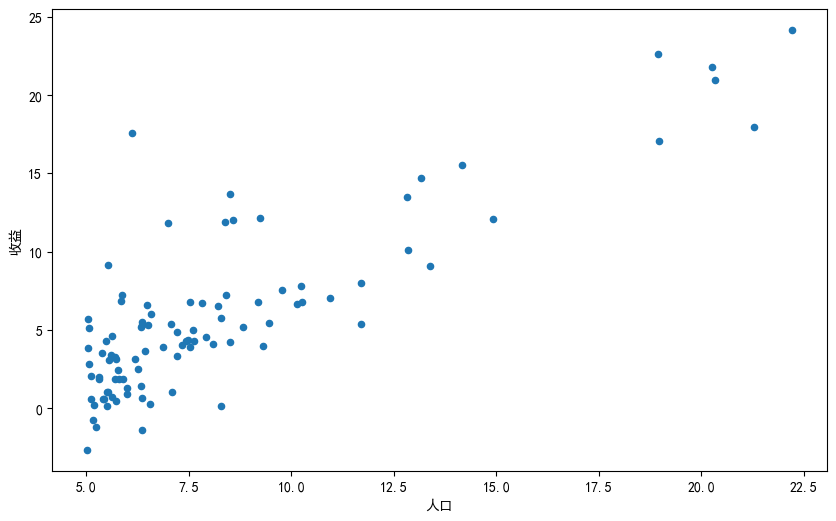

In [7]:
# 1.数据分布可视化
data.plot(kind='scatter', x='人口', y='收益', figsize=(10, 6))
plt.xlabel('人口', fontsize=10)
plt.ylabel('收益', fontsize=10)
plt.show()

对数据进行可视化分析后，很明显可以观察到数据都是一个个散点，但是从整体上看该数据分布有一个特征：`随着横坐标x人口数量的增长，纵坐标y收益也随之增长`，那么我们可以组略的总结概括该样本数据整体上`在数学上的表现是线性的`。

由于在如上数据中，`自变量x-人口` `因变量y-收益`，二者之间的关系是线性的，那么我们可以用归纳为 `y = kx + b`
- `k` 为x的`权重`，也就是斜率
- `b` 为`偏置项`，也就是常数项

# 使用梯度下降来实现线性回归，从而[最小化代价函数](../1.Base/1.10 梯度下降.md)
> [!NOTE]
> 代价函数也就是损失函数，简单理解就是使用梯度下降来使得损失降到最低
> 首先我们创建一个以参数 $w$ 为特征函数的代价函数，注意$w$为特征函数
> $ J(x) = \\frac{1}{2m}\\sum\\limits_{i=1}^{m}{{{\\left( {{h}}\\left( {{x}^{(i)}} \\right)-{{y}^{(i)}} \\right)}^{2}}} $
> 其中 $ h(x) = w^{T}*X = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n $

In [8]:
def computeCost(X, y, w):
    """
    计算线性回归模型的代价函数
    :param X: 特征矩阵，形状为[n_samples, n_features]
    :param y: 标签向量，形状为[n_samples, 1]
    :param w: 权重向量，形状为[n_features, 1]
    :return: 代价函数的值
    """
    # 计算预测值与实际值之差的平方和
    inner = np.power(X @ w -y, 2)
    
    # 对平方和进行求和，并处以样本数量的两倍，得到代价函数的值
    output = np.sum(inner) / (2 * len(X))
    
    return output

In [9]:
# 在训练集中添加一列(插入值全为1)，用来计算代价和梯度
data.insert(0, "Auxiliary", 1)
data

,Auxiliary,人口,收益
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


# 初始化变量

In [10]:
# 获取data的列数
cols = data.shape[1]

# 获取除最后一列外的所有列作为特征矩阵X
X = data.iloc[:, :cols - 1]

# 获取最后一列作为目标变量
y = data.iloc[:, cols - 1:]

# 检验初始化 `特征变量X` `目标变量` 形状是否正确

In [11]:
X.head()

,Auxiliary,人口
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [12]:
y.head()

,收益
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


# 初始化代价函数 w

In [14]:
X = X.values
y = y.values
w = np.zeros((X.shape[1], 1))

In [16]:
# w现在是一个形状为（2，1）的二维数组，2代表两个特征
print(w)

[[0.]
 [0.]]


# 检验所有初始化维度

In [17]:
X.shape, w.shape, y.shape

((97, 2), (2, 1), (97, 1))

# 初始化代价函数

In [18]:
computeCost(X, y, w)

32.072733877455676

# 批量梯度下降算法

In [19]:
def batch_gradientDescent(X, y, w, alpha, count):
    """
    :param X: 特征矩阵，形状为[n_samples, n_features]
    :param y: 标签向量，形状为[n_samples, 1]
    :param w: 权重向量，形状为[n_features, 1]
    :param alpha: 学习率
    :param count: 迭代次数
    :return: 
        - w: 更新后的权重向量
        - costs: 每次迭代的代价函数值列表
    """
    # 初始化代价函数值列表
    costs = []
    
    # 对每个样本进行迭代
    for i in range(count):
        # 根据公式更新权重向量
        w = w - (X.T @ (X @ w - y) * alpha / len(X))
        
        # 计算当前代价函数值并添加到列表中
        cost = computeCost(X, y, w)
        costs.append(cost)
        
        # 每隔100次迭代输出一次当前代价函数值（损失值）
        if i % 100 == 0:
            print(f"在第{i}次迭代中，cost的值是：{cost}")
    
    # 返回最终的权重向量、代价函数值列表
    return w, costs

# 初始化附加变量-学习速率α和要执行的迭代次数

In [20]:
alpha = 0.01
iters = 2000

# 执行梯度下降算法，使得参数θ适合于训练集

In [21]:
w, costs = batch_gradientDescent(X, y, w, alpha, iters)

在第0次迭代中，cost的值是：6.737190464870011
在第100次迭代中，cost的值是：5.476362817272741
在第200次迭代中，cost的值是：5.173634551165022
在第300次迭代中，cost的值是：4.962606493117519
在第400次迭代中，cost的值是：4.815501494116686
在第500次迭代中，cost的值是：4.712956453749759
在第600次迭代中，cost的值是：4.6414735988143185
在第700次迭代中，cost的值是：4.591643801766726
在第800次迭代中，cost的值是：4.5569080784097515
在第900次迭代中，cost的值是：4.532694243543437
在第1000次迭代中，cost的值是：4.515815084502823
在第1100次迭代中，cost的值是：4.504048835517841
在第1200次迭代中，cost的值是：4.49584673167822
在第1300次迭代中，cost的值是：4.490129148489064
在第1400次迭代中，cost的值是：4.486143493324961
在第1500次迭代中，cost的值是：4.483365143354072
在第1600次迭代中，cost的值是：4.481428390613829
在第1700次迭代中，cost的值是：4.480078304693718
在第1800次迭代中，cost的值是：4.479137176818275
在第1900次迭代中，cost的值是：4.478481128440361


## 检验权重向量

In [22]:
print(w)

[[-3.78806857]
 [ 1.18221277]]


# 使用拟合的参数 w 计算训练模型的代价函数（误差）

In [23]:
computeCost(X, y, w)

4.4780276098799705

> 初始代价函数为32.072733877455676，使用拟合后的参数w计算得来的损失为4.4780276098799705

# 绘制线性模型以及数据，可视化拟合结果

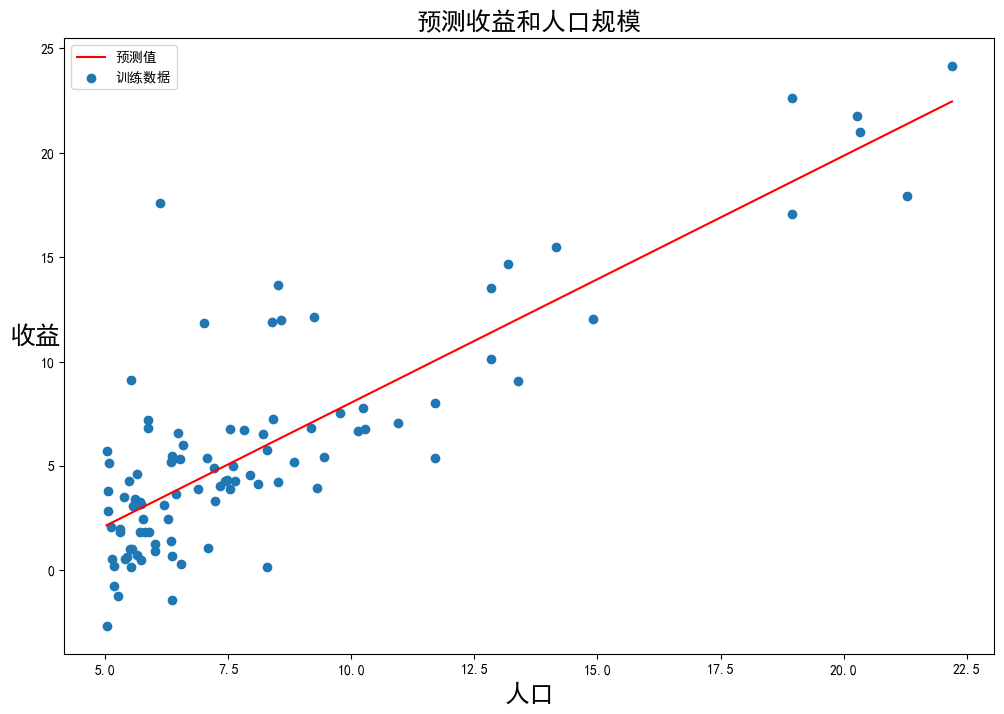

In [24]:
# 生成预测值
x = np.linspace(data['人口'].min(), data['人口'].max(), 100)
# 根据参数估计值生成预测值
f = w[0, 0] + (w[1, 0] * x)
# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 8))
# 绘制预测值曲线
ax.plot(x, f, 'r', label='预测值')
# 绘制训练数据散点图
ax.scatter(data['人口'], data['收益'], label='训练数据')
# 添加图例
ax.legend(loc=2)
# 设置x轴和y轴标签
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
# 设置图标题
ax.set_title('预测收益和人口规模', fontsize=18)
# 显示图形
plt.show()

> 由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

## 可视化模型训练的损失随训练Epoch的变化

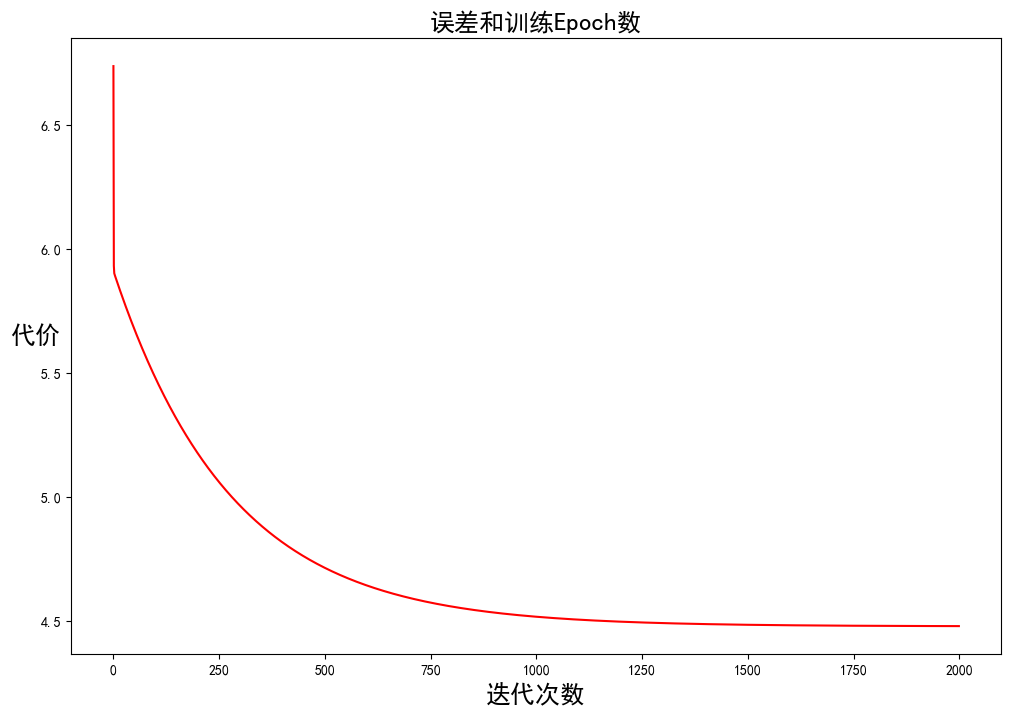

In [25]:
# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 8))
# 绘制代价随迭代次数的变化曲线
ax.plot(np.arange(iters), costs, 'r')
# 设置x轴和y轴标签
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价', rotation=0, fontsize=18)
# 设置图标题
ax.set_title('误差和训练Epoch数', fontsize=18)
# 显示图形
plt.show()